In [2]:
import sqlite3
import requests
import seaborn as sns
#cur = conn.cursor()
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from src.make_db import create_movies_db


In [3]:
create_movies_db()

imdb_title_principals table created successfully....
imdb_name_basic table created successfully....
imdb_title_crew table created successfully....
imdb_title_ratings table created successfully....
imdb_title_basics table created successfully....
imdb_title_akas table created successfully....
tn_movie_budgets table created successfully....
tmdb_movies table created successfully....
bom_movie_gross table created successfully....
rotten_tomatoes_critic_reviews table created successfully....
rotten_tomatoes_movies table created successfully....
Inserting data into the imdb_title_crew table....
Inserting data into the tmdb_movies table....
Inserting data into the imdb_title_akas table....
Inserting data into the imdb_title_ratings table....
Inserting data into the imdb_name_basics table....
Inserting data into the rotten_tomatoes_movies table....
Inserting data into the rotten_tomatoes_critic_reviews table....
Inserting data into the imdb_title_basics table....
Inserting data into the tn_mo

In [4]:
conn = sqlite3.connect('data\movies.db')
movie_title = pd.read_sql ('''SELECT original_title, release_date, genres , worldwide_gross, production_budget, runtime_minutes
                              FROM imdb_title_basics
                              JOIN tn_movie_budgets
                              ON primary_title=movie
                              
                              
                              ''',conn)

movie_title

,original_title,release_date,genres,worldwide_gross,production_budget,runtime_minutes
0,Foodfight!,"Dec 31, 2012","Action,Animation,Comedy","$73,706","$45,000,000",91.0
1,Mortal Kombat,"Aug 18, 1995","Action,Adventure,Fantasy","$122,133,227","$20,000,000",NaN
2,The Overnight,"Jun 19, 2015",None,"$1,165,996","$200,000",88.0
3,On the Road,"Mar 22, 2013","Adventure,Drama,Romance","$9,313,302","$25,000,000",124.0
4,The Secret Life of Walter Mitty,"Dec 25, 2013","Adventure,Comedy,Drama","$187,861,183","$91,000,000",114.0
...,...,...,...,...,...,...
3810,Trapped,"Sep 20, 2002",None,"$6,916,869","$30,000,000",NaN
3811,The Promise,"Apr 21, 2017",Drama,"$10,551,417","$90,000,000",NaN
3812,Sublime,"Mar 13, 2007",Documentary,$0,"$1,800,000",NaN
3813,Columbus,"Aug 4, 2017",Comedy,"$1,110,511","$700,000",85.0


In [5]:
movie_title['worldwide_gross'] = movie_title['worldwide_gross'].str.replace('$', '').str.replace(',','')
movie_title['worldwide_gross'] = movie_title['worldwide_gross'].astype(float)
movie_title['production_budget'] = movie_title['production_budget'].str.replace('$', '').str.replace(',','')
movie_title['production_budget'] = movie_title['production_budget'].astype(float)

In [6]:
movie_title['list_genres'] = movie_title['genres'].map(lambda x: str(x).split(','))

movie_title['month'] = movie_title['release_date'].map(lambda x: x[:3])

movie_title['ROI'] = movie_title['worldwide_gross']/movie_title['production_budget']

movie_title.head(2)

,original_title,release_date,genres,worldwide_gross,production_budget,runtime_minutes,list_genres,month,ROI
0,Foodfight!,"Dec 31, 2012","Action,Animation,Comedy",73706.0,45000000.0,91.0,"[Action, Animation, Comedy]",Dec,0.001638
1,Mortal Kombat,"Aug 18, 1995","Action,Adventure,Fantasy",122133227.0,20000000.0,NaN,"[Action, Adventure, Fantasy]",Aug,6.106661


In [7]:
list_of_genre_types = []
for i in range(len(movie_title)):
    for x in movie_title['list_genres'][i]:
        if x in list_of_genre_types:
            continue
        elif x not in list_of_genre_types:
            list_of_genre_types.append(x)

In [8]:
list_of_genre_types.sort()
list_of_genre_types

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'None',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [9]:
for genre in list_of_genre_types:
    movie_title[genre] = movie_title['list_genres'].map(lambda x: True if (genre in x) else False)

In [10]:
movie_title

,original_title,release_date,genres,worldwide_gross,production_budget,runtime_minutes,list_genres,month,ROI,Action,...,Mystery,News,None,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Foodfight!,"Dec 31, 2012","Action,Animation,Comedy",73706.0,45000000.0,91.0,"[Action, Animation, Comedy]",Dec,0.001638,True,...,False,False,False,False,False,False,False,False,False,False
1,Mortal Kombat,"Aug 18, 1995","Action,Adventure,Fantasy",122133227.0,20000000.0,NaN,"[Action, Adventure, Fantasy]",Aug,6.106661,True,...,False,False,False,False,False,False,False,False,False,False
2,The Overnight,"Jun 19, 2015",None,1165996.0,200000.0,88.0,[None],Jun,5.829980,False,...,False,False,True,False,False,False,False,False,False,False
3,On the Road,"Mar 22, 2013","Adventure,Drama,Romance",9313302.0,25000000.0,124.0,"[Adventure, Drama, Romance]",Mar,0.372532,False,...,False,False,False,False,True,False,False,False,False,False
4,The Secret Life of Walter Mitty,"Dec 25, 2013","Adventure,Comedy,Drama",187861183.0,91000000.0,114.0,"[Adventure, Comedy, Drama]",Dec,2.064409,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,Trapped,"Sep 20, 2002",None,6916869.0,30000000.0,NaN,[None],Sep,0.230562,False,...,False,False,True,False,False,False,False,False,False,False
3811,The Promise,"Apr 21, 2017",Drama,10551417.0,90000000.0,NaN,[Drama],Apr,0.117238,False,...,False,False,False,False,False,False,False,False,False,False
3812,Sublime,"Mar 13, 2007",Documentary,0.0,1800000.0,NaN,[Documentary],Mar,0.000000,False,...,False,False,False,False,False,False,False,False,False,False
3813,Columbus,"Aug 4, 2017",Comedy,1110511.0,700000.0,85.0,[Comedy],Aug,1.586444,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
gross_dict = {}

for genre in list_of_genre_types:
    gross_dict[genre] = {'average_gross': movie_title[movie_title[genre] == True]['worldwide_gross'].mean(),
                           'number_movies': len(movie_title[movie_title[genre] == True])}

In [12]:
del gross_dict['Reality-TV']
del gross_dict['None']

C:\Users\kylev\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


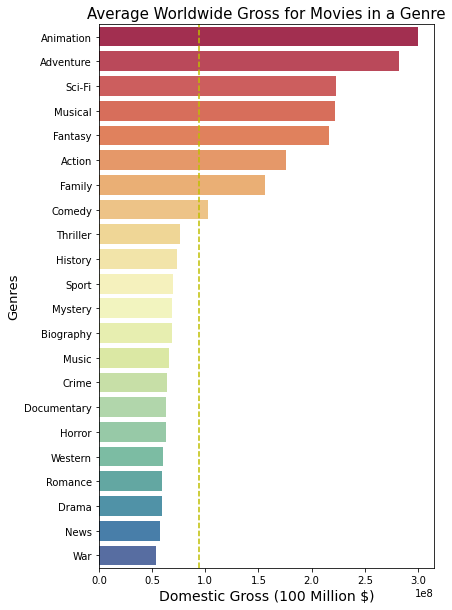

In [13]:
gross_dict_sorted = dict(sorted(gross_dict.items(), key=lambda item: item[1]['average_gross']))
gross_sorted = [value['average_gross'] for key, value in gross_dict_sorted.items()][::-1]
genres_sorted = [key for key, value in gross_dict_sorted.items()][::-1]
fig, ax = plt.subplots(figsize=(6,10))
# Draw plot
sns.barplot(gross_sorted, genres_sorted, palette = 'Spectral', orient='horizonatal')
# Add a line to show the average domestic gross for all movies.
avg_gross = np.mean(movie_title['worldwide_gross'])
plt.axvline(x=avg_gross, ymin=0, ymax=1, color='y', linestyle='--')
# Set labels
ax.tick_params(axis='x' , labelrotation = 0)
ax.set_ylabel('Genres', fontsize=13)
ax.set_xlabel('Domestic Gross (100 Million $)', fontsize=14)
ax.set_title('Average Worldwide Gross for Movies in a Genre', fontsize=15);

In [14]:
gross_ROI = {}

for genre in list_of_genre_types:
    gross_ROI[genre] = {'average_ROI': movie_title[movie_title[genre] == True]['ROI'].mean(),
                           'number_movies': len(movie_title[movie_title[genre] == True])}

In [15]:
del gross_ROI['Reality-TV']
del gross_ROI['None']

C:\Users\kylev\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


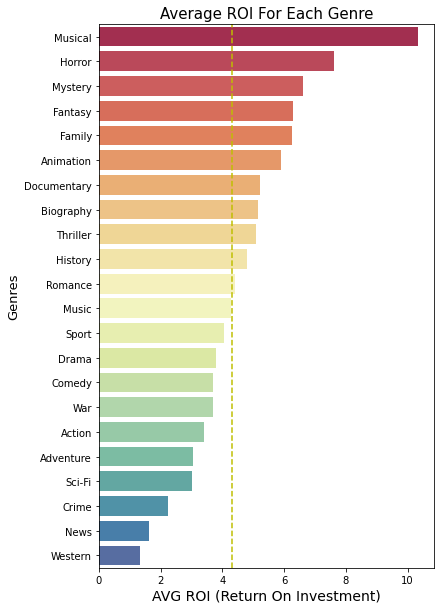

In [16]:
gross_ROI_sorted = dict(sorted(gross_ROI.items(), key=lambda item: item[1]['average_ROI']))
gross_sorted = [value['average_ROI'] for key, value in gross_ROI_sorted.items()][::-1]
genres_sorted = [key for key, value in gross_ROI_sorted.items()][::-1]
fig, ax = plt.subplots(figsize=(6,10))
# Draw plot
sns.barplot(gross_sorted, genres_sorted, palette = 'Spectral', orient='horizonatal')
# Add a line to show the average domestic gross for all movies.
avg_gross = np.mean(movie_title['ROI'])
plt.axvline(x=avg_gross, ymin=0, ymax=1, color='y', linestyle='--')
# Set labels
ax.tick_params(axis='x' , labelrotation = 0)
ax.set_ylabel('Genres', fontsize=13)
ax.set_xlabel('AVG ROI (Return On Investment)', fontsize=14)
ax.set_title('Average ROI For Each Genre', fontsize=15);

In [17]:
movie_title = movie_title.sort_values('worldwide_gross', ascending=False)

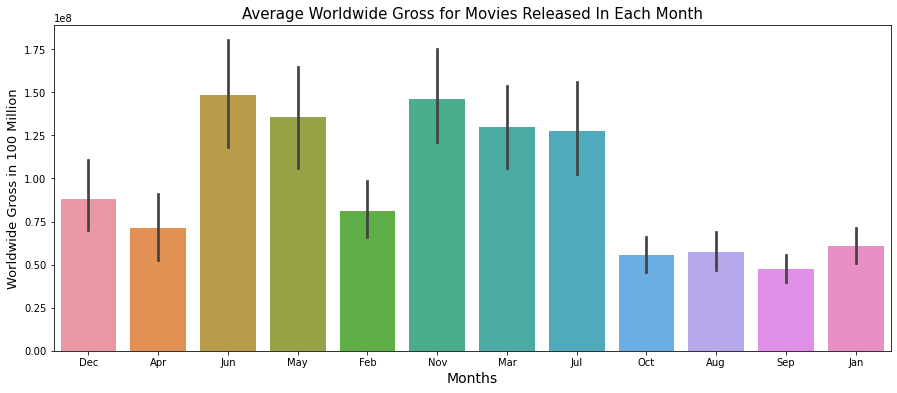

In [18]:
fig, ax = plt.subplots(figsize=(15,6))

sns.barplot(data=movie_title, x= 'month', y='worldwide_gross')
ax.set_ylabel('Worldwide Gross in 100 Million', fontsize=13)
ax.set_xlabel('Months', fontsize=14)
ax.set_title('Average Worldwide Gross for Movies Released In Each Month', fontsize=15);

In [19]:
movie_title = movie_title.dropna(subset=['runtime_minutes'])
movie_title

,original_title,release_date,genres,worldwide_gross,production_budget,runtime_minutes,list_genres,month,ROI,Action,...,Mystery,News,None,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
1044,Abatâ,"Dec 18, 2009",Horror,2.776345e+09,425000000.0,93.0,[Horror],Dec,6.532577,False,...,False,False,False,False,False,False,False,False,False,False
3684,Titanic,"Dec 19, 1997",Family,2.208208e+09,200000000.0,115.0,[Family],Dec,11.041042,False,...,False,False,False,False,False,False,False,False,False,False
2573,Avengers: Infinity War,"Apr 27, 2018","Action,Adventure,Sci-Fi",2.048134e+09,300000000.0,149.0,"[Action, Adventure, Sci-Fi]",Apr,6.827114,True,...,False,False,False,False,False,True,False,False,False,False
6,Jurassic World,"Jun 12, 2015","Action,Adventure,Sci-Fi",1.648855e+09,215000000.0,124.0,"[Action, Adventure, Sci-Fi]",Jun,7.669092,True,...,False,False,False,False,False,True,False,False,False,False
1998,Furious Seven,"Apr 3, 2015","Action,Crime,Thriller",1.518723e+09,190000000.0,137.0,"[Action, Crime, Thriller]",Apr,7.993278,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493,Eden,"Jan 19, 2016","Crime,Drama",0.000000e+00,2300000.0,85.0,"[Crime, Drama]",Jan,0.000000,False,...,False,False,False,False,False,False,False,False,False,False
1035,The Curse of Downers Grove,"Aug 21, 2015","Drama,Horror,Mystery",0.000000e+00,2000000.0,89.0,"[Drama, Horror, Mystery]",Aug,0.000000,False,...,True,False,False,False,False,False,False,False,False,False
1811,Her Cry: La Llorona Investigation,"Oct 25, 2013",Horror,0.000000e+00,35000.0,89.0,[Horror],Oct,0.000000,False,...,False,False,False,False,False,False,False,False,False,False
2518,Home,"Jun 5, 2009",Drama,0.000000e+00,12000000.0,103.0,[Drama],Jun,0.000000,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
gross_RunTime = {}

for genre in list_of_genre_types:
    gross_RunTime[genre] = {'average_RunTime': movie_title[movie_title[genre] == True]['runtime_minutes'].mean(),
                           'number_movies': len(movie_title[movie_title[genre] == True])}

In [21]:
del gross_RunTime['Reality-TV']
del gross_RunTime['None']

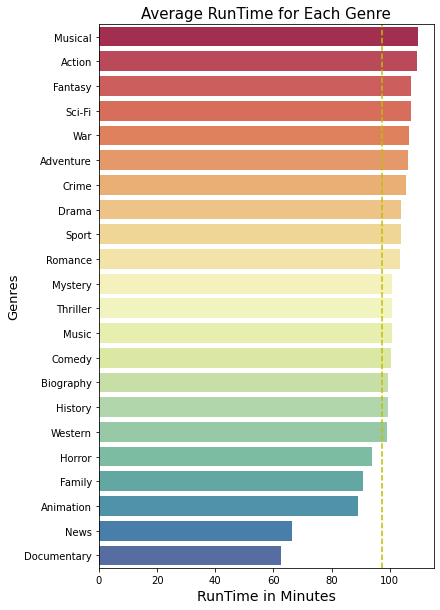

In [22]:
gross_RunTime_sorted = dict(sorted(gross_RunTime.items(), key=lambda item: item[1]['average_RunTime']))
gross_sorted = [value['average_RunTime'] for key, value in gross_RunTime_sorted.items()][::-1]
genres_sorted = [key for key, value in gross_RunTime_sorted.items()][::-1]
fig, ax = plt.subplots(figsize=(6,10))
# Draw plot
sns.barplot(x=gross_sorted, y=genres_sorted, palette = 'Spectral', orient='horizonatal')
# Add a line to show the average domestic gross for all movies.
avg_gross = np.mean(movie_title['runtime_minutes'])
plt.axvline(x=avg_gross, ymin=0, ymax=1, color='y', linestyle='--')
# Set labels
ax.tick_params(axis='x' , labelrotation = 0)
ax.set_ylabel('Genres', fontsize=13)
ax.set_xlabel('RunTime in Minutes', fontsize=14)
ax.set_title('Average RunTime for Each Genre', fontsize=15);